# Sales Predictive Modeling using Regression

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Exploratory Data Analysis](#section3)<br>
4. [Training and testing the Model](#section4)<br>
    - 4.1 [Splitting data into training and test datasets](#section401)<br>
    - 4.2 [Linear regression in scikit-learn](#section402)<br>
    - 4.3 [Interpreting Model Coefficients](#section403)<br>
    - 4.4 [Using the Model for Prediction](#section404)<br>
    
5. [Model evaluation](#section5)<br>
    - 5.1 [Model evaluation using metrics](#section501)<br>


<a id=section1></a>

## 1. Problem Statement

__Sales__ (in thousands of units) for a particular product as a __function__ of __advertising budgets__ (in thousands of dollars) for _TV, radio, and newspaper media_. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input budgets for TV, radio and newspaper __predicts the output sales__.

- Which media __contribute__ to sales?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

<a id=section2></a>

## 2. Data Loading and Description

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv and newspaper.
- TV        - Spend on TV Advertisements
- Radio     - Spend on radio Advertisements
- Newspaper - Spend on newspaper Advertisements
- Sales     - Sales revenue generated

__Importing Packages__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings  #This ensures that warnings are not executed, warnings like a certain function will be deprecated/degraded 
warnings.filterwarnings('ignore')


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
# This line is very crucial especially when you work with libraries like plotly 
# whom their plots tend to be hidden after some time

%matplotlib inline

#### Importing the Dataset

In [3]:
data = pd.read_csv('C:/Users/Sicelo/Desktop/Advertising.csv', index_col=0)

data.head(100)


#index_col= 0, forces the '0' column to be our indexing column...i.e. use it to label our rows

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
96,163.3,31.6,52.9,16.9
97,197.6,3.5,5.9,11.7
98,184.9,21.0,22.0,15.5
99,289.7,42.3,51.2,25.4


In [4]:
data.shape

(200, 4)

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

<a id=section3></a>

## 3. Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Are there any __missing values__

In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no missing values in the data

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are 200 **observations**, and thus 200 markets in the dataset.

__Distribution of Features__

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

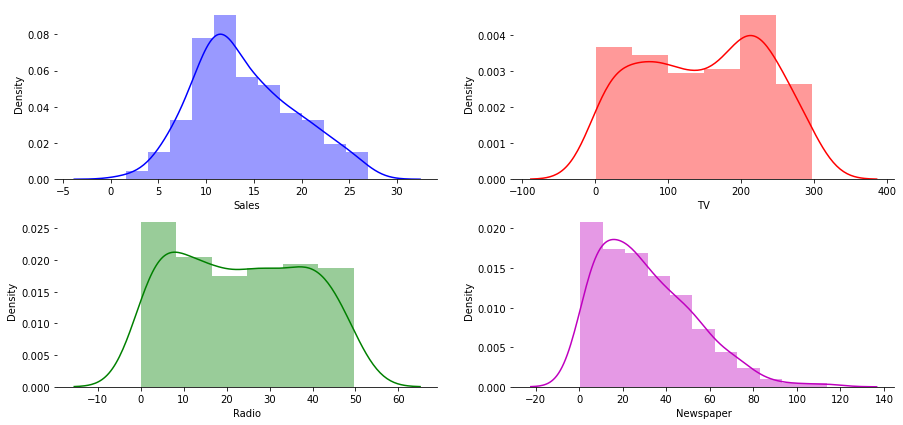

In [8]:
#This part is very important as a way of visualising your summary statistics that you have provided previously

f, axes = plt.subplots(2, 2, figsize=(15, 7), sharex=False)  # Set up the matplotlib figure

#  sharex = False or 'none': each subplot x will be independent, by default it is false, so need to stress!!!!

sns.despine(left=True) #This removes the plot boxes around each subplot

sns.distplot(data.Sales, color="b", ax=axes[0, 0])

sns.distplot(data.TV, color="r", ax=axes[0, 1])

sns.distplot(data.Radio, color="g", ax=axes[1, 0])

sns.distplot(data.Newspaper, color="m", ax=axes[1, 1])

### Is there a relationship between sales and spend various advertising channels?

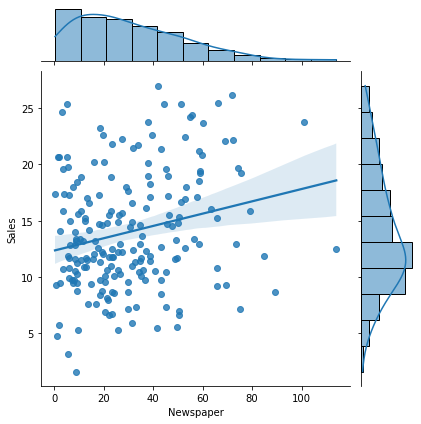

In [9]:
# Here we are exploring on whether there is a relationship between the newspaper and sales  using a jointplot

# Sometimes you may just simply use just the scatter plot


JG1 = sns.jointplot("Newspaper", "Sales", data=data, kind='reg')

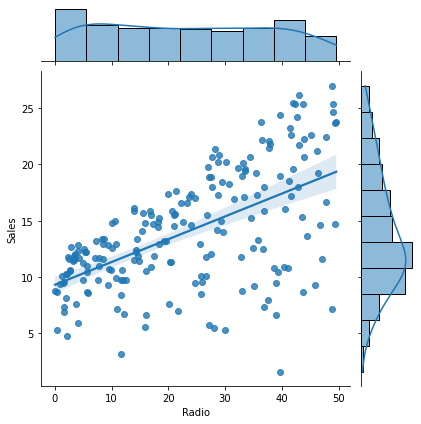

In [10]:
JG2 = sns.jointplot("Radio", "Sales", data=data, kind='reg')

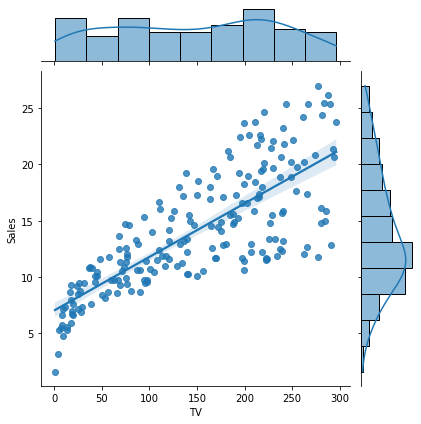

In [11]:
JG3 = sns.jointplot("TV", "Sales", data=data, kind='reg')

__Observation__<br/>
_Sales and spend on newpaper_ is __not__ highly correlated where are _sales and spend on tv_ is __highly correlated__.

### Visualising Pairwise correlation

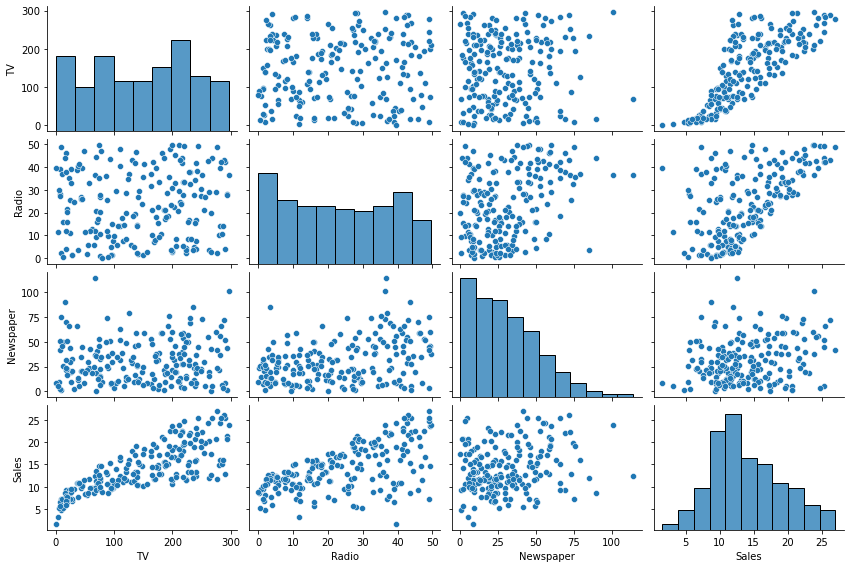

In [12]:
#Sometimes to evaluate all feature relationships, you may use the scatter matrix

#This can be implemented using pd.plotting.scatter_matrix

#But for a better presentation, please use seaborn pairplot for now.

sns.pairplot(data, height = 2, aspect = 1.5)

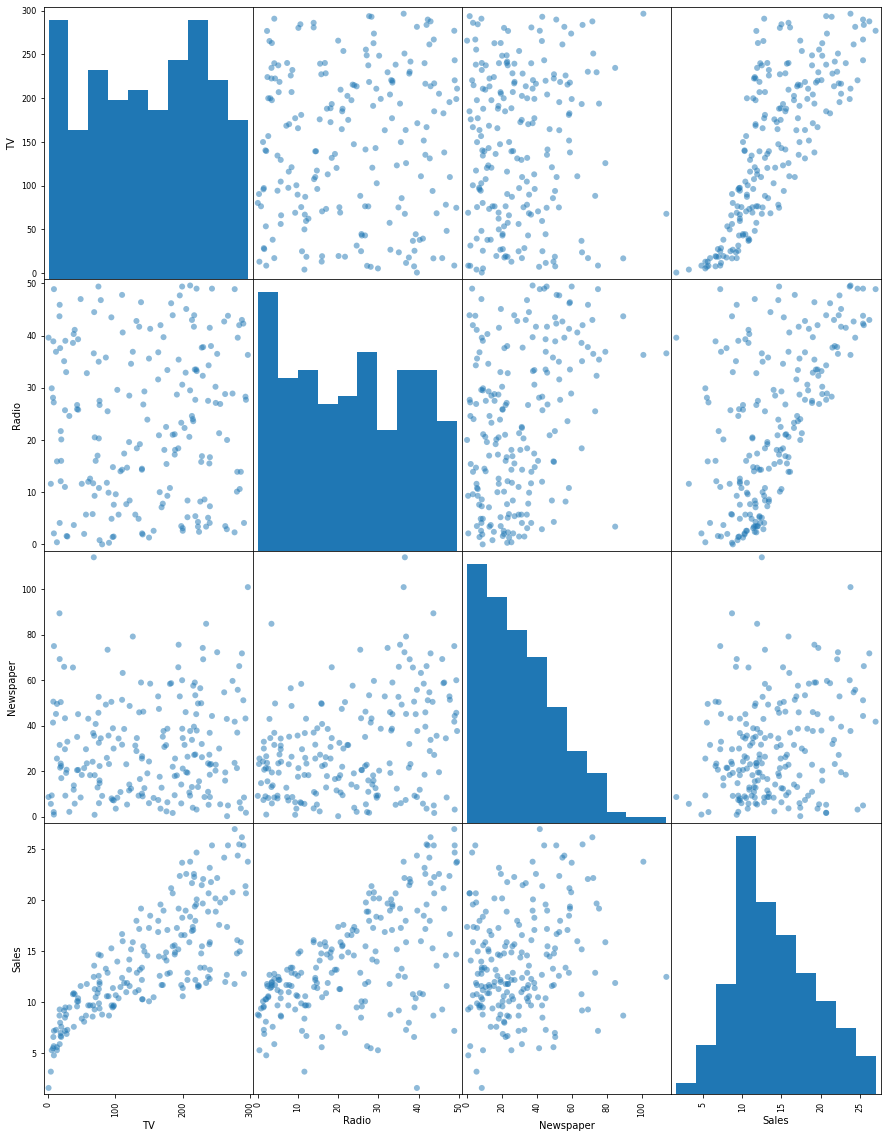

In [13]:
#Plotting using pandas plotting scatter matrix

pd.plotting.scatter_matrix( frame = data, figsize = (15, 20), marker='o');


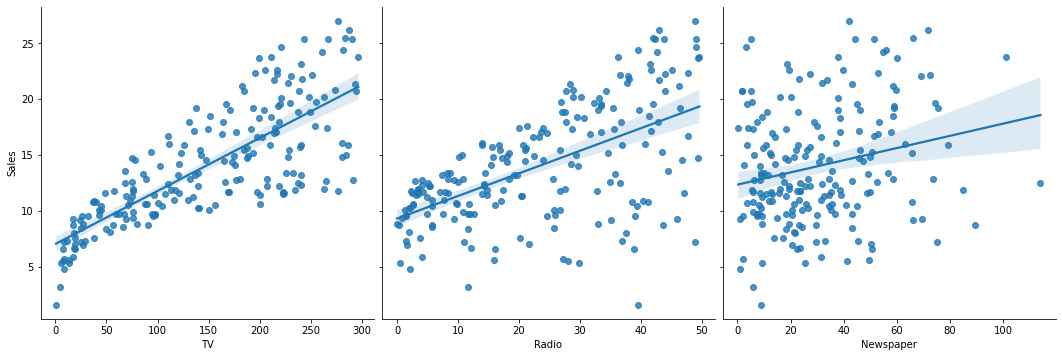

In [14]:
sns.pairplot(data, x_vars =['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=5, aspect=1, kind='reg')

#recall that the 'reg' ensures that the regression line is shown on our plot

__Observation__

- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales



### Calculating and Plotting heatmap correlation

In [15]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


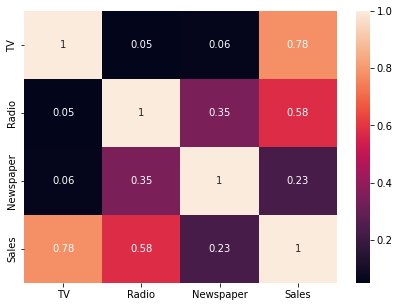

In [16]:
plt.figure(figsize=(7,5))

sns.heatmap(round(data.corr(),2),annot=True) #alternatively we can use the line below
#  sns.heatmap(data.corr(),  annot = True, fmt = '.2f')

plt.show()

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __TV and Sales is highest i.e. 0.78__ and then between __sales and radio i.e. 0.576__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model building__.


<a id=section4></a>

## 4. Training and Testing the Model

<a id=section401></a>

### 4.1 Splitting data into training and test datasets. "WHY?"

The key purpose of splitting the dataset into training and test sets is:

- To estimate how well the learned model will generalize to new data.

- So that you can try your algorithm to one half and evaluate the result on the other half.

In [17]:
features = ['TV', 'Radio', 'Newspaper']                # create a Python list of feature names
target = ['Sales']                                     # Define the target variable

In [18]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [19]:
data[features]

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [20]:
data[target]

,Sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [22]:
from sklearn.model_selection import train_test_split

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5000)

In [23]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (190, 3)
y_train shape:  (190, 1)

Test cases as below
X_test shape:  (10, 3)
y_test shape:  (10, 1)


See the impact of the __random state = 5000__ 

This is very important for the reproducibility of the results

The random state ensures that these the training and testing set remain the same, unless you switch to 0


In [24]:
X_train.head()

,TV,Radio,Newspaper
65,131.1,42.8,28.9
78,120.5,28.5,14.2
170,284.3,10.6,6.4
164,163.5,36.8,7.4
101,222.4,4.3,49.8


In [25]:
y_train.head()

,Sales
65,18.0
78,14.2
170,15.0
164,18.0
101,11.7


In [26]:
X_test.head()

,TV,Radio,Newspaper
200,232.1,8.6,8.7
29,248.8,27.1,22.9
124,123.1,34.6,12.4
2,44.5,39.3,45.1
122,18.8,21.7,50.4


In [27]:
y_test.head()

,Sales
200,13.4
29,18.9
124,15.2
2,10.4
122,7.0


<a id=section402></a>

### 4.2 Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Evaluate Model - Calculate RMSE and R square

The code block given below shows how these steps will be carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    lr_model = LinearRegression()
    ll_model.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    r2_test = metrics.r2_score(y_test, y_pred_test)```

In [28]:
#Instantiating the model

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=True)

In [29]:
#Fitting the model

lr_model.fit(X_train, y_train)

LinearRegression()

<a id=section403></a>

### 4.3 Interpreting Model Coefficients

In [30]:
print('Intercept:',lr_model.intercept_)          # print the intercept 

print('Coefficients:',lr_model.coef_)  

Intercept: [2.98804537]
Coefficients: [[ 0.04574295  0.18812717 -0.00031962]]


In [31]:
X_train.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [32]:
(lr_model.coef_).T

array([[ 0.04574295],
       [ 0.18812717],
       [-0.00031962]])

In [33]:
pd.DataFrame((lr_model.coef_).T, columns=['Co-efficients'] , index =X_train.columns,
             ).sort_values('Co-efficients',ascending=False)

,Co-efficients
Radio,0.188127
TV,0.045743
Newspaper,-0.000320


__y = 2.9 + 0.0468 `*` TV + 0.1785 `*` radio + 0.00258 `*` newspaper__

How do we interpret the TV coefficient (0.0468)
- A "unit" increase in TV ad spending is **associated with** a _"0.0468_ unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of ~0.0468 * 1000 = 47 widgets.

Important Notes:
- This is a statement of __association__, not __causation__.
- If an increase in TV ad spending was associated with a __decrease__ in sales,  β1  would be __negative.__

<a id=section404></a>

### 4.4 Using the Model for Prediction

In [34]:
y_pred_train = lr_model.predict(X_train)  

In [36]:
y_pred_train                                                         # make predictions on the training set

array([[17.02755225],
       [13.85715676],
       [17.98486857],
       [17.38773256],
       [13.95430738],
       [18.00624166],
       [15.00293682],
       [20.925685  ],
       [12.60984156],
       [ 8.94223668],
       [18.68431423],
       [20.88297629],
       [ 9.18845319],
       [22.95622551],
       [12.02277   ],
       [17.122956  ],
       [ 4.56793713],
       [ 9.96950398],
       [10.65892863],
       [21.30848509],
       [14.81321194],
       [16.60213615],
       [ 9.53961681],
       [17.669057  ],
       [14.47856617],
       [15.03281197],
       [ 7.62665857],
       [ 6.62163142],
       [13.27147858],
       [20.49960471],
       [23.31680333],
       [21.15520632],
       [11.8009309 ],
       [10.64681483],
       [15.68391965],
       [17.35562597],
       [ 9.87985222],
       [23.34302283],
       [ 6.65368948],
       [14.42946875],
       [15.4506998 ],
       [ 7.09505724],
       [ 9.97134351],
       [ 8.20238456],
       [23.84092868],
       [19

In [37]:
y_pred_test = lr_model.predict(X_test)                                  # make predictions on the testing set

In [38]:
y_pred_test

array([[15.22009711],
       [19.45981854],
       [15.12423951],
       [12.40258987],
       [ 7.91426381],
       [11.41350004],
       [15.66607952],
       [12.38771194],
       [15.66955342],
       [16.44776759]])

- We need an evaluation metric in order to compare our predictions with the actual values.

<a id=section5></a>

## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

<a id=section501></a>

### 5.1 Model Evaluation using __metrics.__

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
MAE_train = round(mean_absolute_error(y_train, y_pred_train), 3)
MAE_test = round(mean_absolute_error(y_test, y_pred_test), 3)


print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 1.237
MAE for test set is 1.349


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

**Our main aim when we fit our linear regression model is to minimize this value as much as possible**

In [43]:
MSE_train = round(mean_squared_error(y_train, y_pred_train), 3)
MSE_test = round(mean_squared_error(y_test, y_pred_test), 3)


print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 2.766
MSE for test set is 3.21


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [45]:
#Here we will just use the square root to the previous computations

RMSE_train = round(np.sqrt(MSE_train), 3)
RMSE_test = round(np.sqrt(MSE_test), 3)

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.663
RMSE for test set is 1.792


Comparing these metrics:
- __RMSE__ is more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

__R-squared__ 
    
   Represents the percentage of the dependent variable’s variation that can be predicted based on the independent variables. **Closer to 1 is better.**

In [50]:
R_squared = round(r2_score(y_test, y_pred_test), 3)

print("The R squared value on testing set: {} ".format(R_squared))

The R squared value on testing set: 0.723 


<a id=section8></a>

We need to check on how well the model can perform on testing set hence also on the unseen data 

Our $R^{2}$ value is not that bad but is there a way in which we can improve our model?

Or is there any other algorithm we can use?

### Ridge Regression

In [53]:
from sklearn.linear_model import Ridge

Ridge = Ridge()

Ridge.fit(X_train, y_train)

ridge_pred = Ridge.predict(X_test)

Ridge_r_square = round(r2_score(y_test, ridge_pred), 3)

print("The Rsquared value using the Ridge regression: {}".format(Ridge_r_square))

The Rsquared value using the Ridge regression: 0.723


It turns out that both Linear Regression and Ridge have the same $R^{2}$ value

We know that Linear regression models are also prone to scaling, let us scale our data and see what happens

Are there changes that may occur in our model

#### Preprocessing 

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()

lr_scaled.fit(X_train_scaled, y_train)

y_scaled_pred = lr_scaled.predict(X_test_scaled)

lr_scaled_rsquare = round(r2_score(y_test, y_scaled_pred), 3)

print("The Rsquared value using the Scaled data: {}".format(lr_scaled_rsquare))

The Rsquared value using the Ridge regression: 0.723


In [61]:
from sklearn.linear_model import Ridge

Ridge_scaled = Ridge()

Ridge_scaled.fit(X_train_scaled, y_train)

Ridge_scaled_pred = lr_scaled.predict(X_test_scaled)

Ridge_scaled_rsquare = round(r2_score(y_test, Ridge_scaled_pred), 3)

print("The Rsquared value using the Scaled data: {}".format(Ridge_scaled_rsquare))

The Rsquared value using the Scaled data: 0.723


#### Tuning some Hyperparameters

In [60]:
r2_scores = []

for alpha in [0, 0.1, 1]:
    
    Ridge_scaled = Ridge(alpha = alpha)
    
    Ridge_scaled.fit(X_train_scaled, y_train)

    Ridge_scaled_pred = lr_scaled.predict(X_test_scaled)
    
    Ridge_scaled_rsquare = round(r2_score(y_test, Ridge_scaled_pred), 3)
    
    r2_scores.append(Ridge_scaled_rsquare)
    

print(r2_scores)

[0.723, 0.723, 0.723]


Tuning some parameters such as alpha does not change our model that much